# Classical Chinese Fill Mask Task Experiment

by Eric Bennett

This notebook shows the results of running a fillmask task on a portion of text from Yueweicaotangbiji, a Classical Chinese text, using a number of different models, including 2 pre-trained BERT models trained on specialized Classical Chinese data, 2 unspecialized BERT models, and a number of commercial models including gpt-4o and claude opus

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [45]:
scores_df = pd.read_csv('scores.csv')
scores_df.head(2)

,model,text_name,index,source,result_1,score_1,result_2,score_2,result_3,score_3,result_4,score_4,masked_text,date_created
0,sikubert,text_1,0,戴,曰,0.142589,號,0.080299,名,0.053575,字,0.048954,[MASK]遂堂先生諱亨，姚安公癸巳同年也。罷齊河令歸，嘗館餘家。言其先德本浙江人，心思巧密...,2024-10-14
1,sikubert,text_1,1,遂,玉,0.059005,肯,0.054582,月,0.026851,雲,0.025167,戴[MASK]堂先生諱亨，姚安公癸巳同年也。罷齊河令歸，嘗館餘家。言其先德本浙江人，心思巧密...,2024-10-14


In [46]:
#SikuBERT

almost_guesses_bert_df = scores_df[
    (scores_df['source'] == scores_df['result_1']) |
    (scores_df['source'] == scores_df['result_2']) |
    (scores_df['source'] == scores_df['result_3']) |
    (scores_df['source'] == scores_df['result_4'])&
    (scores_df['model'] == 'sikubert')
]
correct_guesses_bert_df = scores_df[
    (scores_df['source'] == scores_df['result_1'])&
    (scores_df['model'] == 'sikubert')
]

In [47]:
#SikuRoBERTa

almost_guesses_roberta_df = scores_df[
    ((scores_df['source'] == scores_df['result_1']) |
    (scores_df['source'] == scores_df['result_2']) |
    (scores_df['source'] == scores_df['result_3']) |
    (scores_df['source'] == scores_df['result_4'])) &
    (scores_df['model'] == 'sikuroberta')
]
correct_guesses_roberta_df = scores_df[
    (scores_df['source'] == scores_df['result_1'])&
    (scores_df['model'] == 'sikuroberta')
]

In [48]:
#Base BERT

almost_guesses_bert_base_df = scores_df[
    ((scores_df['source'] == scores_df['result_1']) |
    (scores_df['source'] == scores_df['result_2']) |
    (scores_df['source'] == scores_df['result_3']) |
    (scores_df['source'] == scores_df['result_4'])) &
    (scores_df['model'] == 'bert-base-multilingual-uncased')
]
correct_guesses_bert_base_df = scores_df[
    (scores_df['source'] == scores_df['result_1'])&
    (scores_df['model'] == 'bert-base-multilingual-uncased')
]

In [49]:
#Base RoBERTa

almost_guesses_roberta_base_df = scores_df[
    ((scores_df['source'] == scores_df['result_1']) |
    (scores_df['source'] == scores_df['result_2']) |
    (scores_df['source'] == scores_df['result_3']) |
    (scores_df['source'] == scores_df['result_4'])) &
    (scores_df['model'] == 'xlm-roberta-base')
]
correct_guesses_roberta_base_df = scores_df[
    (scores_df['source'] == scores_df['result_1'])&
    (scores_df['model'] == 'xlm-roberta-base')
]

In [50]:
# GPT4-o Mini
correct_guesses_4omini_df = scores_df[
    (scores_df['source'] == scores_df['result_1'])&
    (scores_df['model'] == 'gpt-4o-mini')
]

In [51]:
# GPT4-o
correct_guesses_4o_df = scores_df[
    (scores_df['source'] == scores_df['result_1'])&
    (scores_df['model'] == 'gpt-4o')
]

In [52]:
# OPUS
correct_guesses_opus_df = scores_df[
    (scores_df['source'] == scores_df['result_1'])&
    (scores_df['model'] == 'claude-3-opus-20240229')
]

In [53]:
# Haiku
correct_guesses_haiku_df = scores_df[
    (scores_df['source'] == scores_df['result_1'])&
    (scores_df['model'] == 'claude-3-haiku-20240307')
]

In [54]:
print(f"Correct for sikubert: {correct_guesses_bert_df.shape[0]}")
print(f"Almost correct for sikubert: {almost_guesses_bert_df.shape[0]}\n")

print(f"Correct for sikuroberta: {correct_guesses_roberta_df.shape[0]}")
print(f"Almost correct for sikuroberta: {almost_guesses_roberta_df.shape[0]}\n")

print(f"Correct for bert base: {correct_guesses_bert_base_df.shape[0]}")
print(f"Almost correct for bert base: {almost_guesses_bert_base_df.shape[0]}\n")

print(f"Correct for roberta base: {correct_guesses_roberta_base_df.shape[0]}")
print(f"Almost correct for roberta base: {almost_guesses_roberta_base_df.shape[0]}\n")

print("Models without Almost-Guesses (only predicted top option)")
print(f"Correct for 4o mini: {correct_guesses_4omini_df.shape[0]}")

print(f"Correct for 4o: {correct_guesses_4o_df.shape[0]}")

print(f"Correct for Claude Opus: {correct_guesses_opus_df.shape[0]}")

print(f"Correct for Claude Haiku: {correct_guesses_haiku_df.shape[0]}")


Correct for sikubert: 182
Almost correct for sikubert: 1150

Correct for sikuroberta: 180
Almost correct for sikuroberta: 257

Correct for bert base: 108
Almost correct for bert base: 150

Correct for roberta base: 77
Almost correct for roberta base: 118

Models without Almost-Guesses (only predicted top option)
Correct for 4o mini: 43
Correct for 4o: 124
Correct for Claude Opus: 175
Correct for Claude Haiku: 55


## Hyper Accurate Counts

Hyper accuracy is defined at 0.98+ confidence in the top response, with the top response being the correct character

In [ ]:
hyper_correct_guesses_bert_df = scores_df[
    (scores_df['source'] == scores_df['result_1'])&
    (scores_df['model'] == 'sikubert')&
    (scores_df['score_1'] > 0.98)
]
hyper_correct_guesses_roberta_df = scores_df[
    (scores_df['source'] == scores_df['result_1'])&
    (scores_df['model'] == 'sikuroberta')&
    (scores_df['score_1'] > 0.98)
]
hyper_correct_guesses_bert_base_df = scores_df[
    (scores_df['source'] == scores_df['result_1'])&
    (scores_df['model'] == 'bert-base-multilingual-uncased')&
    (scores_df['score_1'] > 0.98)
]
hyper_correct_guesses_roberta_base_df = scores_df[
    (scores_df['source'] == scores_df['result_1'])&
    (scores_df['model'] == 'xlm-roberta-base')&
    (scores_df['score_1'] > 0.98)
]

print(f"sikubert hyper accurate count: {hyper_correct_guesses_bert_df.shape[0]}")
print(f"sikuroberta hyper accurate count: {hyper_correct_guesses_roberta_df.shape[0]}")
print(f"bert base hyper accurate count: {hyper_correct_guesses_bert_base_df.shape[0]}")
print(f"roberta base hyper accurate count: {hyper_correct_guesses_roberta_base_df.shape[0]}")

sikubert hyper accurate count: 52
sikuroberta hyper accurate count: 37
bert base hyper accurate count: 24
roberta base hyper accurate count: 23


## Visualization BERT Trained vs. Untrained

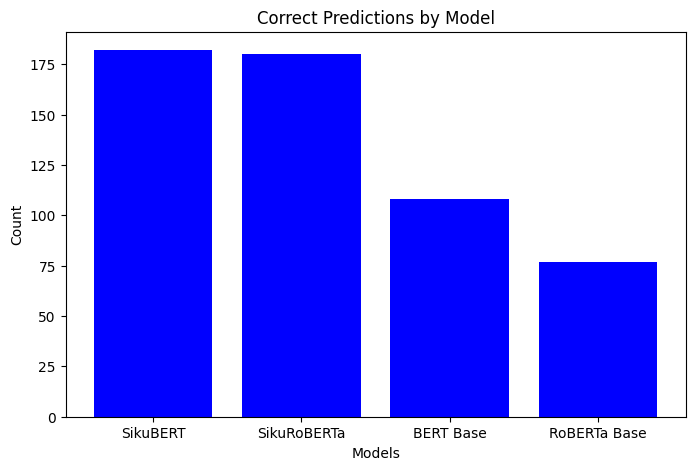

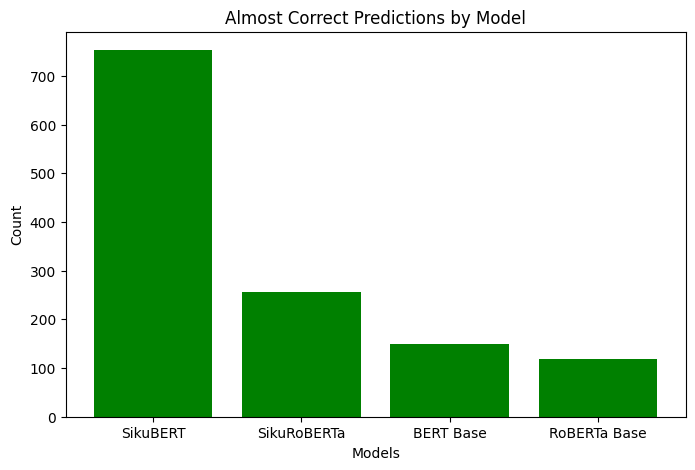

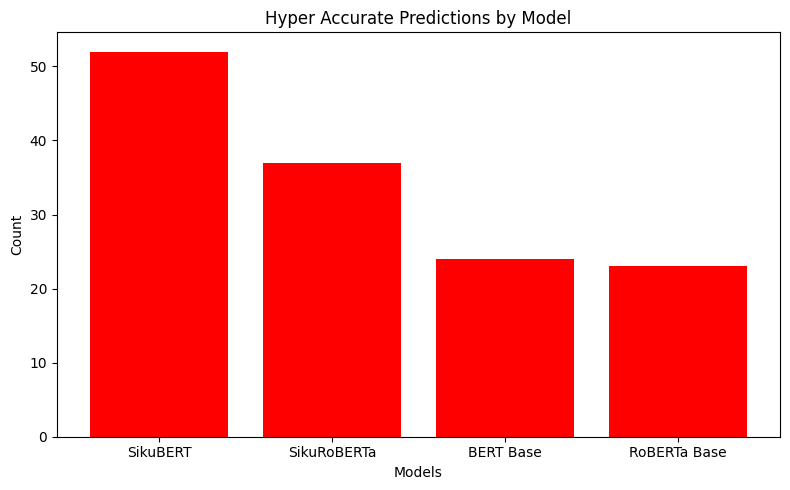

In [38]:

# Data
models = ['SikuBERT', 'SikuRoBERTa', 'BERT Base', 'RoBERTa Base']
correct_counts = [182, 180, 108, 77]
almost_correct_counts = [753, 257, 150, 118]
hyper_accurate_counts = [52, 37, 24, 23]

# X-axis positions
x = np.arange(len(models))

# Plot for correct predictions
fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.bar(x, correct_counts, color='b')
ax1.set_xlabel('Models')
ax1.set_ylabel('Count')
ax1.set_title('Correct Predictions by Model')
ax1.set_xticks(x)
ax1.set_xticklabels(models)

# Plot for almost correct predictions
fig2, ax2 = plt.subplots(figsize=(8, 5))
ax2.bar(x, almost_correct_counts, color='g')
ax2.set_xlabel('Models')
ax2.set_ylabel('Count')
ax2.set_title('Almost Correct Predictions by Model')
ax2.set_xticks(x)
ax2.set_xticklabels(models)

# Plot for hyper accurate predictions
fig3, ax3 = plt.subplots(figsize=(8, 5))
ax3.bar(x, hyper_accurate_counts, color='r')
ax3.set_xlabel('Models')
ax3.set_ylabel('Count')
ax3.set_title('Hyper Accurate Predictions by Model')
ax3.set_xticks(x)
ax3.set_xticklabels(models)

# Display all plots
plt.tight_layout()
plt.show()


# GRAPH with all models

The way the experiment was organized for 

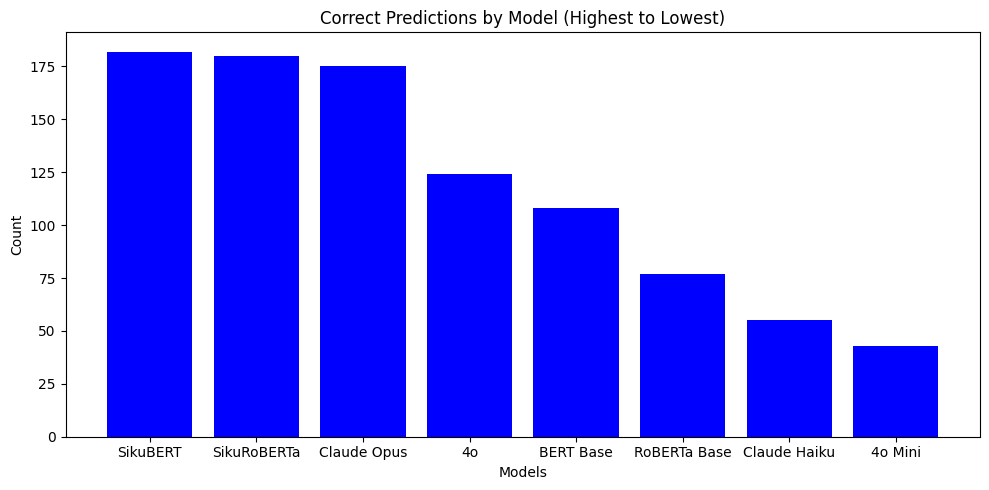

In [43]:
models = ['SikuBERT', 'SikuRoBERTa', 'BERT Base', 'RoBERTa Base', '4o Mini', '4o', 'Claude Opus', 'Claude Haiku']
correct_counts = [182, 180, 108, 77, 43, 124, 175, 55]

correct_data = list(zip(models, correct_counts))
sorted_correct_data = sorted(correct_data, key=lambda x: x[1], reverse=True)
sorted_models_correct, sorted_correct_counts = zip(*sorted_correct_data)

x_correct = np.arange(len(sorted_models_correct))

plt.figure(figsize=(10, 5))
plt.bar(x_correct, sorted_correct_counts, color='b')
plt.xlabel('Models')
plt.ylabel('Count')
plt.title('Correct Predictions by Model (Highest to Lowest)')
plt.xticks(x_correct, sorted_models_correct)

plt.tight_layout()
plt.show()


# CONCLUSION

This experiment provided a number of valuable insights. 

1. SikuBERT and SikuRoBERTa's better performance than unspecialized BERT models proving the importance of training.
2. The interestingly impressive performance of SikuBERT over SikuRoBERTa (why is this?)
3. These specially trained models are beating popular LLMs
4. Opus is much better than expected

Much more to do!